In [6]:
%matplotlib inline
import random
import numpy
import matplotlib.pyplot as plt
import pickle


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )


### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

# Regression with outliers

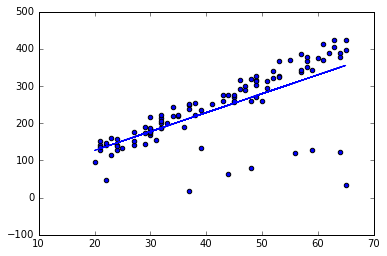

Slope = 5.07793064344
Y-intercept = 25.2100232675
R-squared score for training data= 0.489872596175
R-squared score for test data= 0.878262478835


In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg = reg.fit(ages_train,net_worths_train)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

print "Slope =", reg.coef_[0][0]
print "Y-intercept =", reg.intercept_[0]
print "R-squared score for training data=", reg.score(ages_train,net_worths_train)
print "R-squared score for test data=", reg.score(ages_test,net_worths_test)

# Fuction to clean outliers

In [8]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    array = numpy.hstack(((predictions-net_worths_train)**2,ages_train,net_worths_train,predictions))
    def getKey(item):
        return item[[0]]

    a = sorted(array, key=getKey)
    a = a[:int(len(a)*.9)]
    for i in range(len(a)):
        tuple = (a[i][1],a[i][2],a[i][0])
        cleaned_data.append(tuple)
        
    return cleaned_data



In [9]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

# Regression with outliers removed

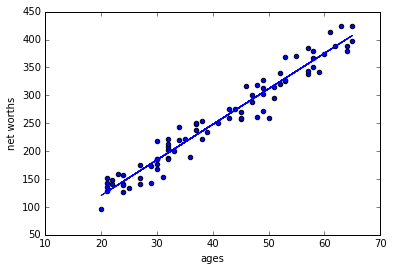

Slope = 6.36859480694
Y-intercept = -6.9186106873
R-squared score for training data= 0.409325454478
R-squared score for test data= 0.983189455396


In [12]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

print "Slope =", reg.coef_[0][0]
print "Y-intercept =", reg.intercept_[0]
print "R-squared score for training data=", reg.score(ages_train,net_worths_train)
print "R-squared score for test data=", reg.score(ages_test,net_worths_test)

# Enron data

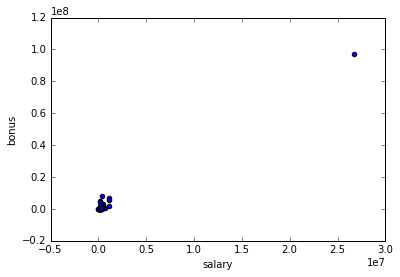

In [23]:
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"] 
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

# Enron data total removed

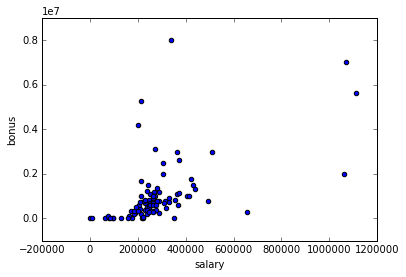

In [22]:
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data_dict.pop( 'TOTAL' ) 
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()